In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly

In [5]:
df = pd.read_csv('/content/part-00000-71d8830f-95af-45c1-bf22-9e40337bac51-c000.csv')

In [6]:
# Define the parameters
arg_distributor_eda = ['DT3501', 'DT5678', 'DT7890', 'DT4500', 'DT9012']
arg_sector_eda = ['BCC', 'FEM', 'FAMILY']
arg_category_eda = ['DIAPERS', 'WIPES', 'FACIAL TISSUES', 'LINERS']
arg_subcategory_eda = ['Huggies', 'Wipes', 'Kotex']

In [7]:
print(df.shape)

(52022, 21)


In [8]:
# Filtering the dataset based on the given parameters
filtered_df = df[
    (df['DISTRIBUTOR_ID'].isin(arg_distributor_eda)) &
    (df['SECTOR'].isin(arg_sector_eda)) &
    (df['CATEGORY'].isin(arg_category_eda)) &
    (df['SUBCATEGPRY'].isin(arg_subcategory_eda))
]

# df = filtered_df

In [9]:
print(filtered_df.shape)

(27975, 21)


In [10]:
# Example analysis: Group by category and plot the total quantity (QTY) for each category
category_group = filtered_df.groupby('CATEGORY')['QTY'].sum().reset_index()

In [11]:
category_group

,CATEGORY,QTY
0,DIAPERS,308992
1,FACIAL TISSUES,439874
2,LINERS,726228
3,WIPES,233870


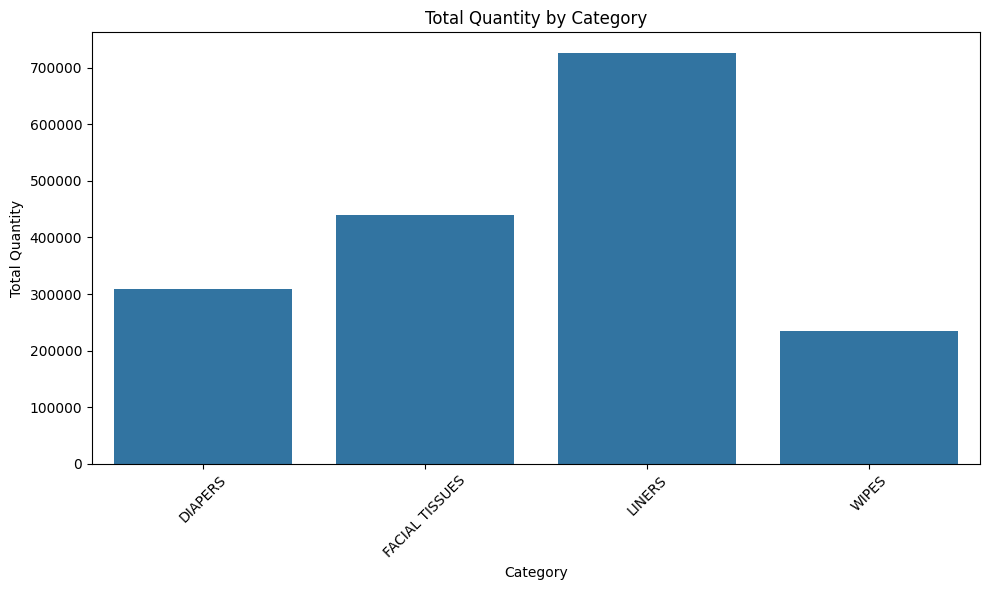

In [12]:
# Plotting the bar chart for category vs total quantity
plt.figure(figsize=(10, 6))
sns.barplot(x='CATEGORY', y='QTY', data=category_group)
plt.title('Total Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

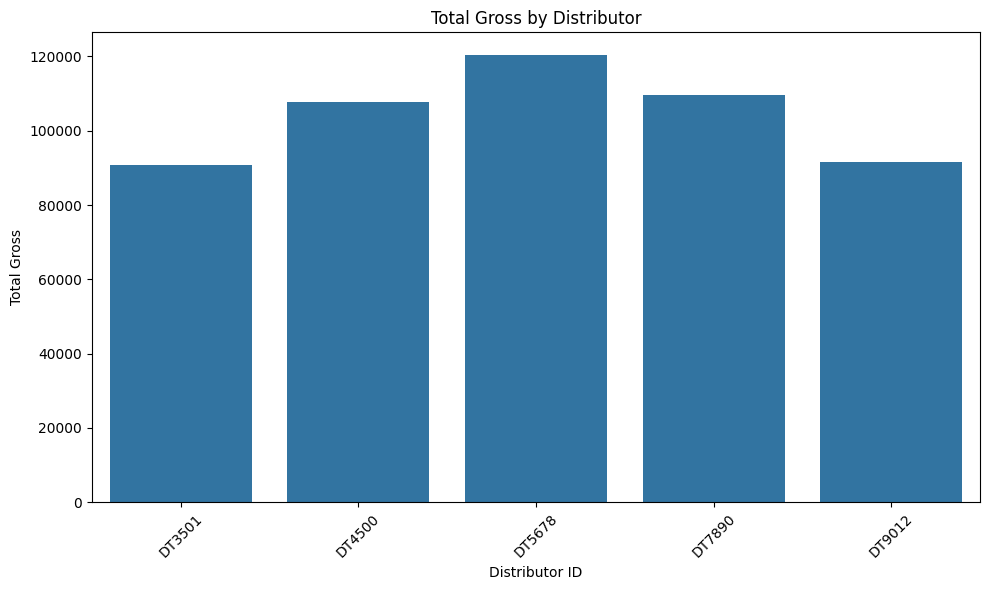

In [13]:
# Group by distributor and calculate the total gross for each
distributor_group = filtered_df.groupby('DISTRIBUTOR_ID')['GROSS'].sum().reset_index()

# Plot total gross by distributor
plt.figure(figsize=(10, 6))
sns.barplot(x='DISTRIBUTOR_ID', y='GROSS', data=distributor_group)
plt.title('Total Gross by Distributor')
plt.xlabel('Distributor ID')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

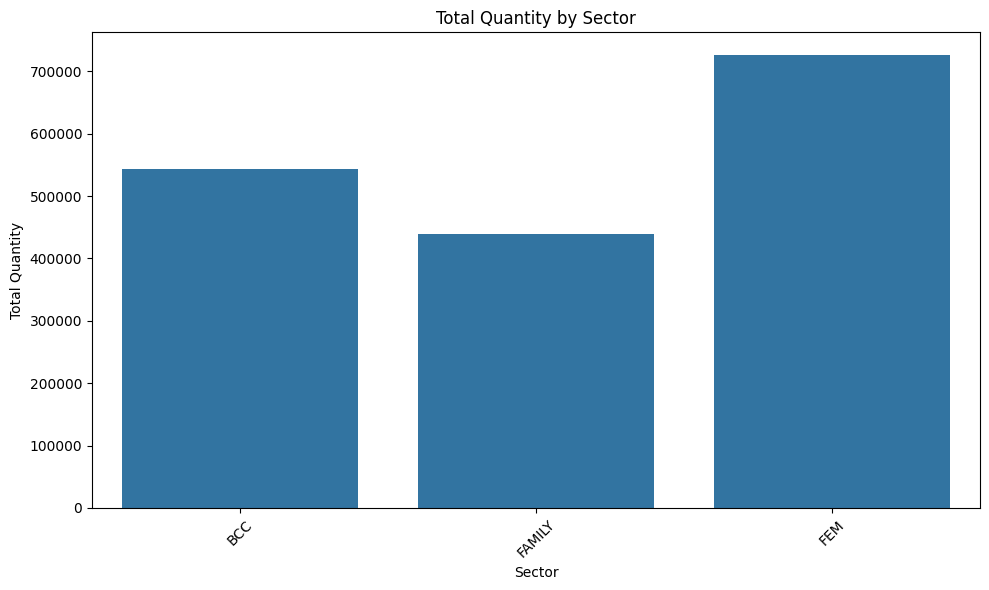

In [14]:
# Group by sector and calculate total quantity
sector_group = filtered_df.groupby('SECTOR')['QTY'].sum().reset_index()

# Plot total quantity by sector
plt.figure(figsize=(10, 6))
sns.barplot(x='SECTOR', y='QTY', data=sector_group)
plt.title('Total Quantity by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

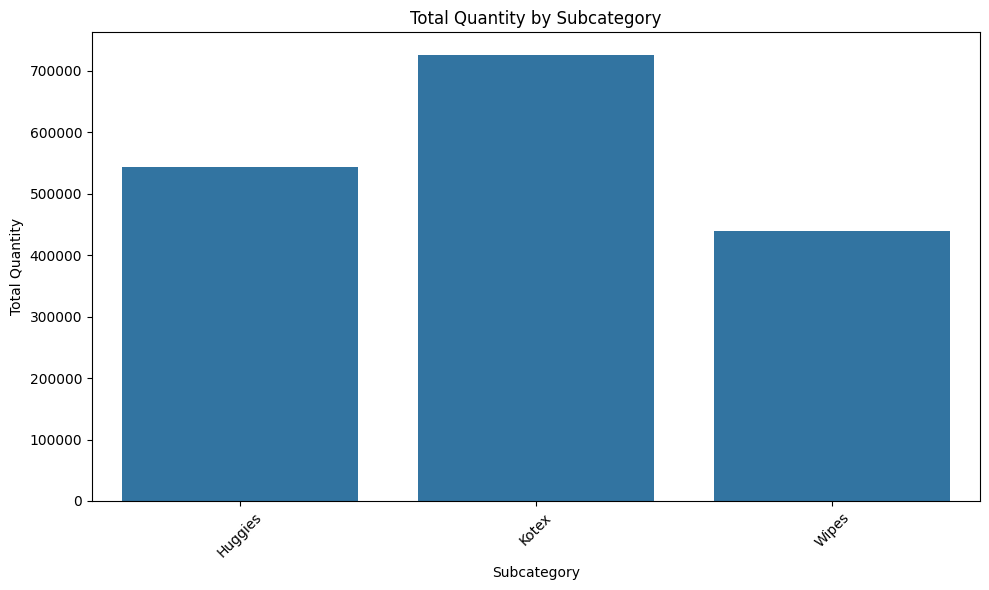

In [15]:
# Group by subcategory and calculate total quantity
subcategory_group = filtered_df.groupby('SUBCATEGPRY')['QTY'].sum().reset_index()

# Plot total quantity by subcategory
plt.figure(figsize=(10, 6))
sns.barplot(x='SUBCATEGPRY', y='QTY', data=subcategory_group)
plt.title('Total Quantity by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

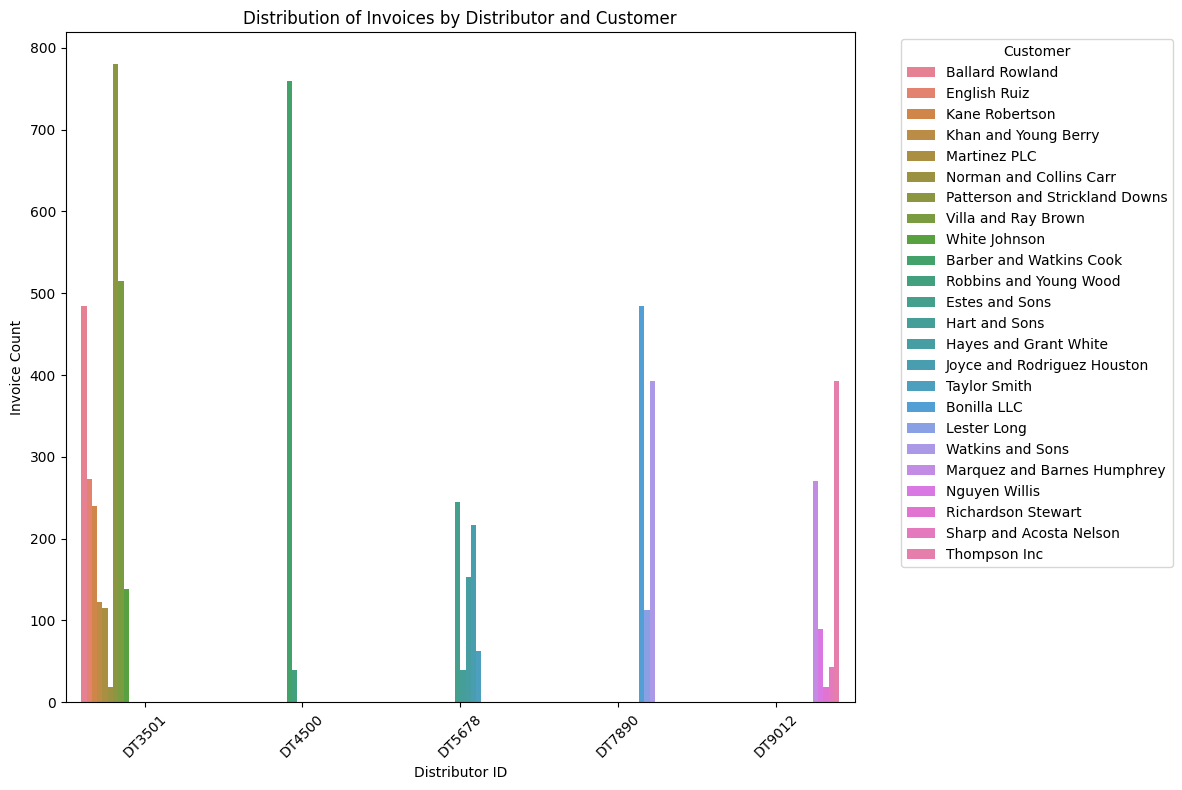

In [16]:
# Grouping by distributor and customer to count the number of invoices per combination
invoice_distribution = filtered_df.groupby(['DISTRIBUTOR_ID', 'CUST_NAME'])['INV_NO'].count().reset_index()
invoice_distribution.rename(columns={'INV_NO': 'Invoice_Count'}, inplace=True)

# Plotting the distribution of invoices by distributor and customer
plt.figure(figsize=(12, 8))
sns.barplot(x='DISTRIBUTOR_ID', y='Invoice_Count', hue='CUST_NAME', data=invoice_distribution)
plt.title('Distribution of Invoices by Distributor and Customer')
plt.xlabel('Distributor ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

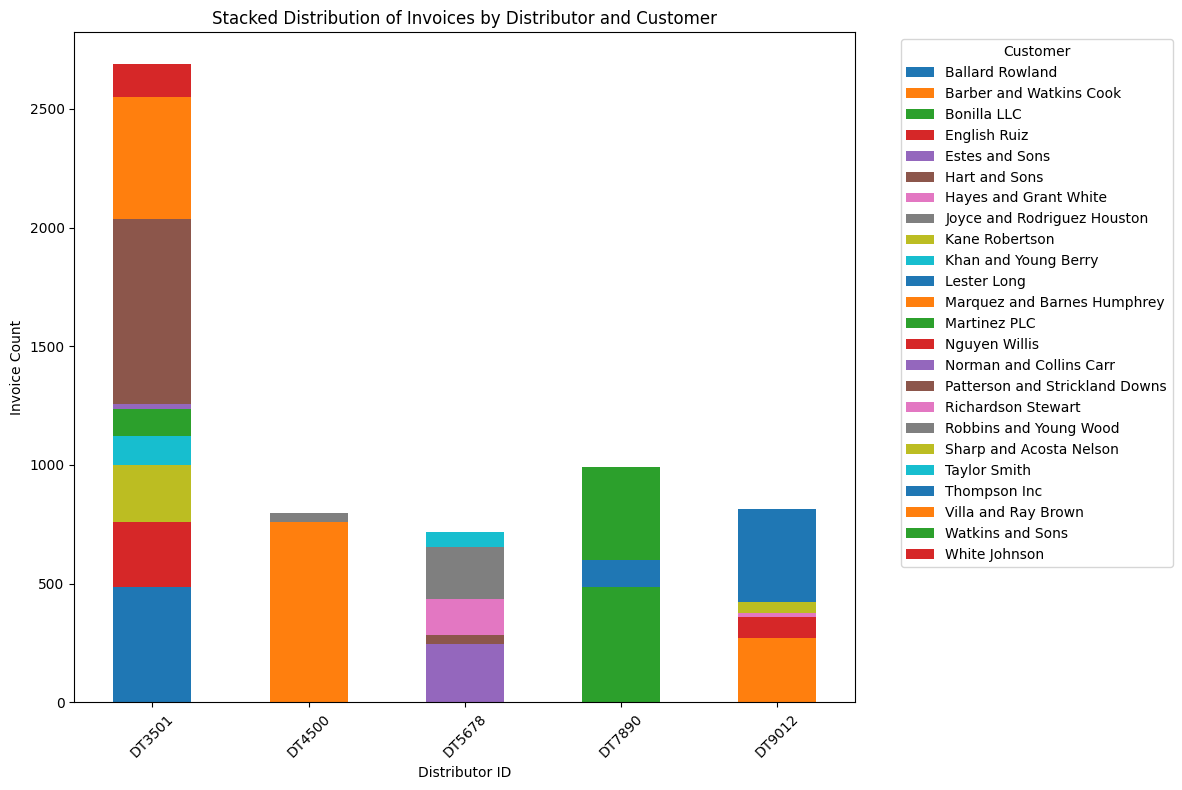

In [17]:
invoice_pivot = filtered_df.pivot_table(
    index='DISTRIBUTOR_ID',
    columns='CUST_NAME',
    values='INV_NO',
    aggfunc='count',
    fill_value=0
)

# Plotting a stacked bar chart for distributor and customer invoice distribution
invoice_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Distribution of Invoices by Distributor and Customer')
plt.xlabel('Distributor ID')
plt.ylabel('Invoice Count')
plt.xticks(rotation=45)
plt.legend(title='Customer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [18]:
import plotly.express as px
import plotly.graph_objs as go
import plotly

# Grouping by distributor and customer to sum the net sales amount
sales_distribution = filtered_df.groupby(['DISTRIBUTOR_ID', 'CUST_NAME'])['GROSS'].sum().reset_index()
sales_distribution.rename(columns={'GROSS': 'Net_Sales_Amount'}, inplace=True)

# Plotting the stacked bar chart using plotly
fig = px.bar(
    sales_distribution,
    x='DISTRIBUTOR_ID',
    y='Net_Sales_Amount',
    color='CUST_NAME',
    title='Distribution of Net Sales Amount by Distributor and Customer',
    labels={'Net_Sales_Amount': 'Net Sales Amount', 'DISTRIBUTOR_ID': 'Distributor ID'},
    barmode='stack',
)

fig.show()


In [19]:
import plotly.offline as pyo

# Grouping the data by distributor and customer, summing the GROSS column as the net sales amount
grouped_data = filtered_df.groupby(['DISTRIBUTOR_ID', 'CUST_NAME'], as_index=False).agg({'GROSS': 'sum'})

fig = go.Figure()

for distributor in grouped_data['DISTRIBUTOR_ID'].unique():
    distributor_data = grouped_data[grouped_data['DISTRIBUTOR_ID'] == distributor]

    fig.add_trace(go.Bar(
        x=distributor_data['CUST_NAME'],
        y=distributor_data['GROSS'],
        name=distributor,
        hoverinfo='x+y+name'
    ))

fig.update_layout(
    title="Distribution of Net Sales Amount by Distributor and Customer",
    xaxis_title="Customer",
    yaxis_title="Net Sales Amount (GROSS)",
    barmode='stack',
    hovermode='x unified'
)


# plotly.offline.plot(fig, filename='net_sales_distribution.html')
pyo.iplot(fig)


In [20]:
# Grouping the data by sector and category, counting the number of invoices
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({'INV_NO': 'count'})
grouped_data.rename(columns={'INV_NO': 'Invoice_Count'}, inplace=True)

# Create a bar plot using plotly express
fig = px.bar(
    grouped_data,
    x='SECTOR',
    y='Invoice_Count',
    color='CATEGORY',
    title='Distribution of Invoices by Sector and Category',
    labels={'SECTOR': 'Sector', 'Invoice_Count': 'Number of Invoices'},
    barmode='group',
    hover_data=['CATEGORY']
)

fig.show()

In [21]:
# Grouping the data by sector and category, counting the number of SKUs
grouped_data = filtered_df.groupby(['SECTOR', 'CATEGORY'], as_index=False).agg({
    'SKUID': 'count'
})

grouped_data.rename(columns={'SKUID': 'skuid_count'}, inplace=True)

fig = px.bar(
    grouped_data,
    x='SECTOR',
    y='skuid_count',
    color='CATEGORY',
    title='Distribution of Product Count by Sector and Category',
    labels={'SECTOR': 'Sector', 'skuid_count': 'Product Count (SKU)'},
    barmode='group'
)

fig.show()

In [22]:
filtered_df['INV_DT'] = pd.to_datetime(filtered_df['INV_DT'], errors='coerce')

# Extract the month from the invoice date
filtered_df['Month'] = filtered_df['INV_DT'].dt.to_period('M').astype(str)

# Grouping the data by month, counting the number of invoices
grouped_data = filtered_df.groupby('Month', as_index=False).agg({
    'INV_NO': 'count'
})

fig = px.bar(
    grouped_data,
    x='Month',
    y='INV_NO',
    title='Distribution of Invoices by Month',
    labels={'Month': 'Month', 'INV_NO': 'Number of Invoices'},
)

fig.show()

<ipython-input-22-120ad04913c7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-120ad04913c7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
filtered_df['inv_dt_dttype_monthname'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by month and customer, counting the number of invoices
grouped_data = filtered_df.groupby(['Month', 'CUST_NAME'], as_index=False).agg({
    'INV_NO': 'count'  # Counting the number of invoices
})

grouped_data.rename(columns={'INV_NO': 'inv_no_count'}, inplace=True)

# Create a bar plot using plotly express to show the invoice distribution by month for each customer
fig = px.bar(
    grouped_data,
    x='Month',
    y='inv_no_count',
    color='CUST_NAME',
    title='Distribution of Invoices by Month for Each Customer',
    labels={'Month': 'Month', 'inv_no_count': 'Number of Invoices', 'CUST_NAME': 'Customer'},
    barmode='group',
)

fig.show()

<ipython-input-23-e0ab3be34ece>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
filtered_df['inv_dt_dttype_monthname'] = filtered_df['INV_DT'].dt.strftime('%B')

# Grouping the data by customer and month, summing the net sales (GROSS column)
grouped_data = filtered_df.groupby(['CUST_NAME', 'inv_dt_dttype_monthname'], as_index=False).agg({
    'GROSS': 'sum'
})

grouped_data.rename(columns={'GROSS': 'net_sum'}, inplace=True)

# Create a bar plot using plotly express to show the distribution of net sales amount by month for each customer
fig = px.bar(
    grouped_data,
    x='inv_dt_dttype_monthname',
    y='net_sum',
    color='CUST_NAME',
    title='Distribution of Net Sales Amount by Month for Each Customer',
    labels={'inv_dt_dttype_monthname': 'Month', 'net_sum': 'Net Sales Amount', 'CUST_NAME': 'Customer'},
    barmode='group',
    category_orders={"inv_dt_dttype_monthname": ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']}
)

fig.show()

<ipython-input-24-e289b8a8048b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
filtered_df.describe()

,INV_DT,QTY,GROSS,UNITPRICE,NET_TOT_TAX,ADJ_AMT,CUST_DISC_AMT,PRODUCT_DISC_AMT,NET
count,27975,27975.000000,27975.000000,27975.000000,27975.0,27975.0,27975.0,27975.0,27975.000000
mean,2023-06-16 05:27:53.565683200,61.088972,18.589897,0.258967,10.0,0.0,4.0,1.0,15.801412
min,2023-01-02 00:00:00,-10.000000,-4.752000,0.004747,10.0,0.0,4.0,1.0,-4.039200
25%,2023-03-19 00:00:00,30.000000,4.468800,0.146400,10.0,0.0,4.0,1.0,3.798480
50%,2023-06-20 00:00:00,48.000000,9.640300,0.260469,10.0,0.0,4.0,1.0,8.194255
75%,2023-08-31 00:00:00,81.000000,26.453000,0.378139,10.0,0.0,4.0,1.0,22.485050
max,2023-12-31 00:00:00,300.000000,138.653800,0.516896,10.0,0.0,4.0,1.0,117.855730
std,NaN,44.696727,19.964998,0.132278,0.0,0.0,0.0,0.0,16.970248


In [26]:
# filtered_df.isna().count()
na_counts = filtered_df.isna().sum()
na_counts

,0
INV_DT,0
INV_NO,0
INV_NO_KEY,0
QTY,0
GROSS,0
UNITPRICE,0
NET_TOT_TAX,0
ADJ_AMT,0
CUST_DISC_AMT,0
PRODUCT_DISC_AMT,0


In [27]:
# List of columns to check cardinality
columns_to_check = ['CUST_NAME', 'CUSTOMER_ID', 'SECTOR', 'CATEGORY', 'SUBCATEGPRY', 'DISTRIBUTOR_ID', 'SKUID', 'DIST_NAME', 'COUNTRY_ID']

# Calculate cardinality for each specified column
cardinality = {col: filtered_df[col].nunique() for col in columns_to_check}

cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Unique Values'])

fig = px.bar(
    cardinality_df,
    x='Column',
    y='Unique Values',
    title='Cardinality of Selected Columns',
    labels={'Column': 'Columns', 'Unique Values': 'Number of Unique Values'}
)

fig.show()

In [28]:
# Create a histogram plot for the 'GROSS' column
fig = px.histogram(
    filtered_df,
    x='GROSS',
    nbins=10,
    title='Histogram of Net Sales Values',
    labels={'GROSS': 'Net Sales (GROSS)'}
)

fig.show()